# Chapter 27

# Deep Learning II

1. Deep learning
2. Introduction to Tensorflow
3. Introduction to Keras

## Deep learning

## Introduction to Tensorflow

## Introduction to Keras

In [14]:

import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.7.0


In [15]:

datasetFileName = "inamul_dataset.npz"

with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']


print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


(33,)
(33,)
(33,)


In [16]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)


object
int32
<U10
(33,)
(33,)
(33,)


In [17]:
dataLabels[0]

0

In [18]:
dataLabelNames

array(['Afiq', 'Azureen', 'Goke', 'Hasan', 'Mahmuda', "Nu'man", 'Afiq',
       'Azureen', 'Gavin', 'Goke', 'Hasan', 'Jin Cheng', 'Mahmuda',
       "Nu'man", 'Sassendran', 'Afiq', 'Azureen', 'Gavin', 'Goke',
       'Hasan', 'Jin Cheng', 'Mahmuda', "Nu'man", 'Sassendran', 'Afiq',
       'Azureen', 'Gavin', 'Goke', 'Hasan', 'Jin Cheng', 'Mahmuda',
       "Nu'man", 'Sassendran'], dtype='<U10')

In [19]:
classNames = sorted(np.unique(dataLabelNames))
classNames

['Afiq',
 'Azureen',
 'Gavin',
 'Goke',
 'Hasan',
 'Jin Cheng',
 'Mahmuda',
 "Nu'man",
 'Sassendran']

In [20]:
# model expect shape of image to be 200x200

import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages.dtype, y.dtype, y.shape

dataImages = y

In [81]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.20, random_state=42)

print(trainImages.shape)
print(testImages.shape)


(26, 200, 200, 3)
(7, 200, 200, 3)


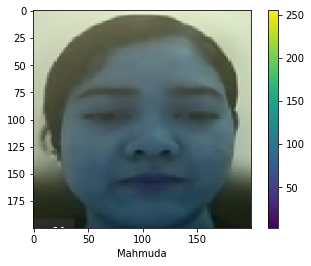

In [82]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [83]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((200, 200, 3), 9)

In [84]:
trainImages = trainImages / 255.0
testImages = testImages / 255.0


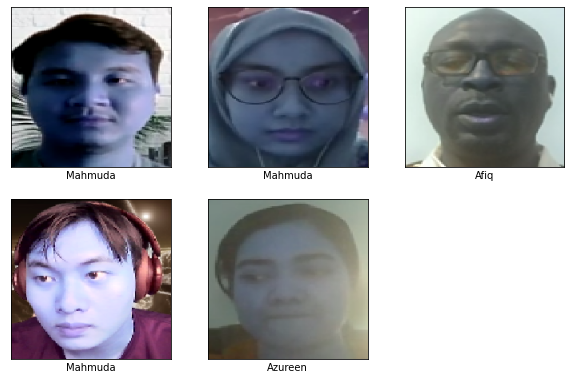

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()

In [86]:
# creating the model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 120000)            0         
                                                                 
 dense_8 (Dense)             (None, 128)               15360128  
                                                                 
 dense_9 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 15,361,289
Trainable params: 15,361,289
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [88]:
testImages.dtype

dtype('float64')

In [93]:
model.fit(trainImages, trainLabels, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 106ms/step - loss: 5.1725 - accuracy: 0.5769
Epoch 2/20
1/1 [==============================] - 0s 91ms/step - loss: 2.6273 - accuracy: 0.5769
Epoch 3/20
1/1 [==============================] - 0s 95ms/step - loss: 3.0043 - accuracy: 0.7308
Epoch 4/20
1/1 [==============================] - 0s 95ms/step - loss: 4.1768 - accuracy: 0.6538
Epoch 5/20
1/1 [==============================] - 0s 95ms/step - loss: 3.5255 - accuracy: 0.6154
Epoch 6/20
1/1 [==============================] - 0s 93ms/step - loss: 3.4122 - accuracy: 0.6154
Epoch 7/20
1/1 [==============================] - 0s 94ms/step - loss: 3.6107 - accuracy: 0.5769
Epoch 8/20
1/1 [==============================] - 0s 93ms/step - loss: 3.0736 - accuracy: 0.7308
Epoch 9/20
1/1 [==============================] - 0s 93ms/step - loss: 2.4411 - accuracy: 0.7692
Epoch 10/20
1/1 [==============================] - 0s 94ms/step - loss: 1.5734 - accuracy: 0.8846
Epoch 11/20
1/1 [===========

In [94]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 0s - loss: 63.4381 - accuracy: 0.5714 - 35ms/epoch - 35ms/step

Test accuracy: 0.5714285969734192


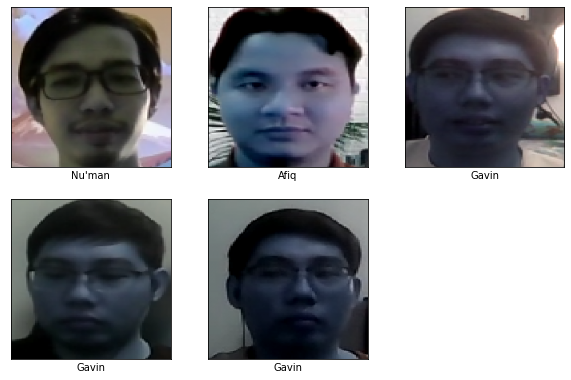

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])
plt.show()

In [59]:
predictions = model.predict(testImages)
predictions[0]

array([  17.278046,  -16.035027,  -97.36329 ,   21.943699, -119.97973 ,
         39.624172,   25.181578,   66.30058 ,   14.279236], dtype=float32)